<h1> <b> <u> NETWORK ANALYSIS AND MINING PROJECT</u> </b> </h1>

Performing Network analysis on a book of choice.
Book chosen: Murder on the Orient Express by Agatha Christie


a. Make a list of characters in the novel. 
b. Extract a social graph of the manually identified characters in the text.
c. Calculate the four types of centrality of main protagonists i.e. degree, betweenness, closeness, PageRank.
d. Calculate the global clustering coefficient of your graph and local clustering coefficient of the main protagonist nodes. 
e. Detect communities.
f. Find the degree distribution, average shortest path, and size of the largest component. 
Create equivalent generative models to compare against the social graph that you extracted 


In [ ]:
#File:https://ia601000.us.archive.org/29/items/MurderOnTheOrientExpress_201803/Murder_on_the_Orient_Express_djvu.txt

In [38]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deepthidayanand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3> Making a character list of the relevant characters in the story. </h3>

In [40]:
characters = [
'Hercule_Poirot', 
'M_Bouc', 
'Dr_Constantine', 
'Mary_Debenham', 
'Mrs_Hubbard', 
'Colonel_Arbuthnot', 
'Princess_Dragomiroff', 
'Hector_MacQueen', 
'Ratchet', 
'Countess_Andrenyi',
'Count_Andrenyi',
'Cyrus_Hardman',
'Antonio_Foscarelli',
'Greta_Ohlsson',
'Hildegarde_Schmidt',
'Edward_Henry_Masterman',
'Pierre_Michel'
]


print(characters)

['Hercule_Poirot', 'M_Bouc', 'Dr_Constantine', 'Mary_Debenham', 'Mrs_Hubbard', 'Colonel_Arbuthnot', 'Princess_Dragomiroff', 'Hector_MacQueen', 'Ratchet', 'Countess_Andrenyi', 'Count_Andrenyi', 'Cyrus_Hardman', 'Antonio_Foscarelli', 'Greta_Ohlsson', 'Hildegarde_Schmidt', 'Edward_Henry_Masterman', 'Pierre_Michel']


<h3> Preprocessing </h3>

In [41]:
with open('/Users/deepthidayanand/Desktop/semesterVI/NAM/050_085_097_120/Murder_on_the_Orient_Express_djvu.txt', encoding='utf-8') as file:
    f = file.read()

In [42]:
f=str(f)

#full names 
f = f.replace('Hercule Poirot', 'Hercule_Poirot')
f = f.replace('M. Bouc','M_Bouc')
f = f.replace('Dr. Constantine','Dr_Constantine')
f = f.replace('Mary Debenham','Mary_Debenham')
f = f.replace('Mrs. Hubbard','Mrs_Hubbard')
f = f.replace('Colonel Arbuthnot','Colonel_Arbuthnot')
f = f.replace('Princess Dragomiroff','Princess_Dragomiroff')
f = f.replace('Hector MacQueen','Hector_MacQueen')
f = f.replace('Ratchet','Ratchet')
f = f.replace('Countess Andrenyi','Countess_Andrenyi')
f = f.replace('Count Andrenyi','Count_Andrenyi')
f = f.replace('Cyrus Hardman','Cyrus_Hardman')
f = f.replace('Antonio Foscarelli','Antonio_Foscarelli')
f = f.replace('Greta Ohlsson','Greta_Ohlsson')
f = f.replace('Hildegarde Schmidt','Hildegarde_Schmidt')
f = f.replace('Edward Henry Masterman','Edward_Henry_Masterman')
f = f.replace('Pierre Michel','Pierre_Michel')

#alternative names

f = f.replace('M. Poirot', 'Hercule_Poirot')
f = f.replace('Poirot', 'Hercule_Poirot')
f = f.replace('Mr. MacQueen','Hector_MacQueen')
f = f.replace('Hardman','Cyrus_Hardman')
f = f.replace('Miss Ohlsson','Greta_Ohlsson')
f = f.replace('Masterman','Edward_Henry_Masterman')
f = f.replace('Michel','Pierre_Michel')


sentences = sent_tokenize(f)
print(len(sentences))

4260


In [43]:
sentences = f.split(".")

In [44]:
print(len(characters))

17


In [45]:
#marker for appendix (remove everything past an appendix)
count = 0 
for sent in sentences:
    count += 1 
    if ("Appendix I" in sent):
        sentences = sentences[:count-1]
        break

In [46]:
# Creating a dataframe
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Hercule_Poirot,M_Bouc,Dr_Constantine,Mary_Debenham,Mrs_Hubbard,Colonel_Arbuthnot,Princess_Dragomiroff,Hector_MacQueen,Ratchet,Countess_Andrenyi,Count_Andrenyi,Cyrus_Hardman,Antonio_Foscarelli,Greta_Ohlsson,Hildegarde_Schmidt,Edward_Henry_Masterman,Pierre_Michel
Hercule_Poirot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
M_Bouc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dr_Constantine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mary_Debenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mrs_Hubbard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    #slicing excludes upper_bound element
    if (index >= n-2): upper_bound = n 
    else: upper_bound = index+2
    
    #creating array with 3 lines from above and below sentence
    array = sentences[lower_bound:upper_bound]  
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)

    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

,Hercule_Poirot,M_Bouc,Dr_Constantine,Mary_Debenham,Mrs_Hubbard,Colonel_Arbuthnot,Princess_Dragomiroff,Hector_MacQueen,Ratchet,Countess_Andrenyi,Count_Andrenyi,Cyrus_Hardman,Antonio_Foscarelli,Greta_Ohlsson,Hildegarde_Schmidt,Edward_Henry_Masterman,Pierre_Michel
Hercule_Poirot,0,145,34,15,49,18,12,10,75,6,2,20,2,5,9,2,12
M_Bouc,145,0,16,1,18,6,12,3,31,4,3,9,1,2,4,1,14
Dr_Constantine,34,16,0,0,7,2,2,0,2,0,1,0,0,0,3,0,1
Mary_Debenham,15,1,0,0,1,3,0,0,1,2,0,0,0,2,2,0,0
Mrs_Hubbard,49,18,7,1,0,1,2,0,16,1,2,2,1,4,8,0,5
Colonel_Arbuthnot,18,6,2,3,1,0,3,7,12,1,4,4,1,1,4,0,5
Princess_Dragomiroff,12,12,2,0,2,3,0,0,4,4,2,3,3,3,2,0,0
Hector_MacQueen,10,3,0,0,0,7,0,0,12,0,2,0,0,0,0,1,1
Ratchet,75,31,2,1,16,12,4,12,0,0,2,23,0,3,2,4,5
Countess_Andrenyi,6,4,0,2,1,1,4,0,0,0,3,2,3,3,2,0,0


<h3> Extracting a social graph </h3>

In [48]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [49]:
# PRINTING THE NODES AND EDGES IN THE GRAPH 

print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 17
Nodes: ['Hercule_Poirot', 'M_Bouc', 'Dr_Constantine', 'Mary_Debenham', 'Mrs_Hubbard', 'Colonel_Arbuthnot', 'Princess_Dragomiroff', 'Hector_MacQueen', 'Ratchet', 'Countess_Andrenyi', 'Count_Andrenyi', 'Cyrus_Hardman', 'Antonio_Foscarelli', 'Greta_Ohlsson', 'Hildegarde_Schmidt', 'Edward_Henry_Masterman', 'Pierre_Michel']

Number of edges in the graph: 101
Edges: [('Hercule_Poirot', 'M_Bouc', {'weight': 145}), ('Hercule_Poirot', 'Dr_Constantine', {'weight': 34}), ('Hercule_Poirot', 'Mary_Debenham', {'weight': 15}), ('Hercule_Poirot', 'Mrs_Hubbard', {'weight': 49}), ('Hercule_Poirot', 'Colonel_Arbuthnot', {'weight': 18}), ('Hercule_Poirot', 'Princess_Dragomiroff', {'weight': 12}), ('Hercule_Poirot', 'Hector_MacQueen', {'weight': 10}), ('Hercule_Poirot', 'Ratchet', {'weight': 75}), ('Hercule_Poirot', 'Countess_Andrenyi', {'weight': 6}), ('Hercule_Poirot', 'Count_Andrenyi', {'weight': 2}), ('Hercule_Poirot', 'Cyrus_Hardman', {'weight': 20}), ('Hercule_Poirot'

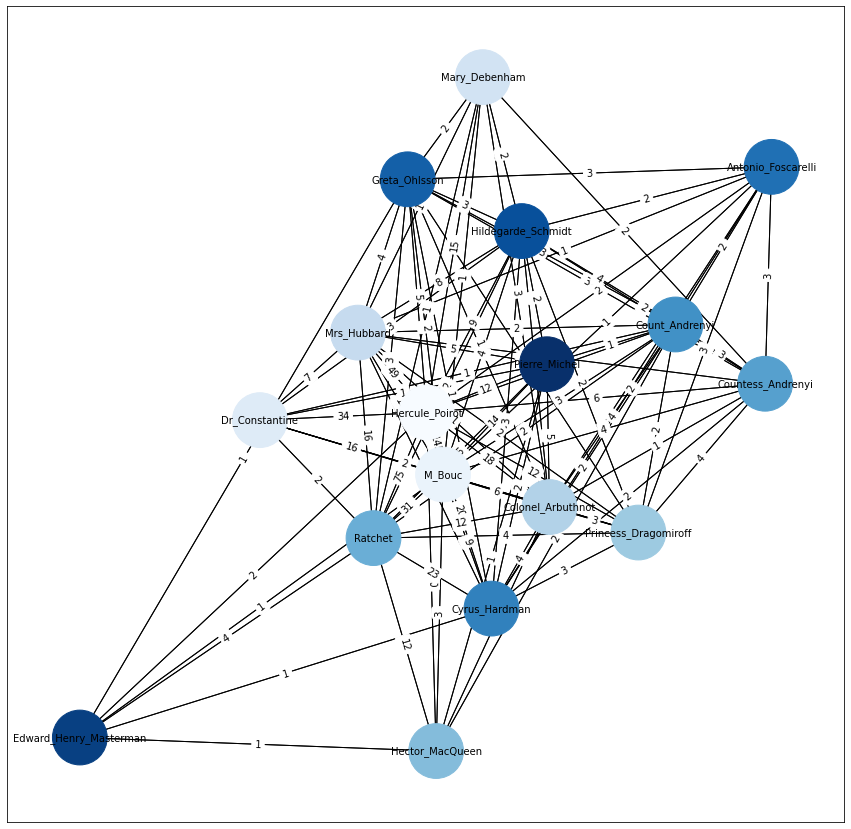

In [50]:
# PLOTTING THE GRAPH 

plt.figure(3, figsize=(15,15))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 3000, font_size=10, node_color=range(17), cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [51]:
# PRINTING NODES AS TUPLES OF NODES + EDGE ATTRIBUTES
list(G.edges(data=True))

[('Hercule_Poirot', 'M_Bouc', {'weight': 145}),
 ('Hercule_Poirot', 'Dr_Constantine', {'weight': 34}),
 ('Hercule_Poirot', 'Mary_Debenham', {'weight': 15}),
 ('Hercule_Poirot', 'Mrs_Hubbard', {'weight': 49}),
 ('Hercule_Poirot', 'Colonel_Arbuthnot', {'weight': 18}),
 ('Hercule_Poirot', 'Princess_Dragomiroff', {'weight': 12}),
 ('Hercule_Poirot', 'Hector_MacQueen', {'weight': 10}),
 ('Hercule_Poirot', 'Ratchet', {'weight': 75}),
 ('Hercule_Poirot', 'Countess_Andrenyi', {'weight': 6}),
 ('Hercule_Poirot', 'Count_Andrenyi', {'weight': 2}),
 ('Hercule_Poirot', 'Cyrus_Hardman', {'weight': 20}),
 ('Hercule_Poirot', 'Antonio_Foscarelli', {'weight': 2}),
 ('Hercule_Poirot', 'Greta_Ohlsson', {'weight': 5}),
 ('Hercule_Poirot', 'Hildegarde_Schmidt', {'weight': 9}),
 ('Hercule_Poirot', 'Edward_Henry_Masterman', {'weight': 2}),
 ('Hercule_Poirot', 'Pierre_Michel', {'weight': 12}),
 ('M_Bouc', 'Dr_Constantine', {'weight': 16}),
 ('M_Bouc', 'Mary_Debenham', {'weight': 1}),
 ('M_Bouc', 'Mrs_Hubbard',

<h3> Calculating the four types of centrality </h3>

Degree Centrality

In [52]:
# DEGREE CENTRALITY
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Hercule_Poirot', 1.0),
 ('M_Bouc', 1.0),
 ('Colonel_Arbuthnot', 0.9375),
 ('Mrs_Hubbard', 0.875),
 ('Ratchet', 0.875),
 ('Count_Andrenyi', 0.875),
 ('Hildegarde_Schmidt', 0.875),
 ('Cyrus_Hardman', 0.8125),
 ('Greta_Ohlsson', 0.8125),
 ('Princess_Dragomiroff', 0.75),
 ('Countess_Andrenyi', 0.6875),
 ('Antonio_Foscarelli', 0.625),
 ('Pierre_Michel', 0.625),
 ('Dr_Constantine', 0.5625),
 ('Mary_Debenham', 0.5),
 ('Hector_MacQueen', 0.4375),
 ('Edward_Henry_Masterman', 0.375)]

Betweenness Centrality

In [53]:
# BETWEENESS CENTRALITY
betc = nx.betweenness_centrality(G)
sorted(betc.items(), key=itemgetter(1), reverse=True)

[('Hercule_Poirot', 0.05068452380952381),
 ('M_Bouc', 0.05068452380952381),
 ('Ratchet', 0.03463955026455026),
 ('Colonel_Arbuthnot', 0.03221230158730159),
 ('Count_Andrenyi', 0.023035714285714284),
 ('Greta_Ohlsson', 0.020102513227513226),
 ('Cyrus_Hardman', 0.019718915343915344),
 ('Mrs_Hubbard', 0.017549603174603176),
 ('Hildegarde_Schmidt', 0.017549603174603176),
 ('Pierre_Michel', 0.006283068783068783),
 ('Princess_Dragomiroff', 0.006107804232804232),
 ('Hector_MacQueen', 0.0044444444444444444),
 ('Countess_Andrenyi', 0.00431547619047619),
 ('Edward_Henry_Masterman', 0.0025793650793650793),
 ('Dr_Constantine', 0.0009259259259259259),
 ('Mary_Debenham', 0.0008333333333333334),
 ('Antonio_Foscarelli', 0.0)]

Closeness Centrality

In [54]:
# CLOSENESS CENTRALITY
closc = nx.closeness_centrality(G)
sorted(closc.items(), key=itemgetter(1), reverse=True)

[('Hercule_Poirot', 1.0),
 ('M_Bouc', 1.0),
 ('Colonel_Arbuthnot', 0.9411764705882353),
 ('Mrs_Hubbard', 0.8888888888888888),
 ('Ratchet', 0.8888888888888888),
 ('Count_Andrenyi', 0.8888888888888888),
 ('Hildegarde_Schmidt', 0.8888888888888888),
 ('Cyrus_Hardman', 0.8421052631578947),
 ('Greta_Ohlsson', 0.8421052631578947),
 ('Princess_Dragomiroff', 0.8),
 ('Countess_Andrenyi', 0.7619047619047619),
 ('Antonio_Foscarelli', 0.7272727272727273),
 ('Pierre_Michel', 0.7272727272727273),
 ('Dr_Constantine', 0.6956521739130435),
 ('Mary_Debenham', 0.6666666666666666),
 ('Hector_MacQueen', 0.64),
 ('Edward_Henry_Masterman', 0.6153846153846154)]

Page Rank

In [55]:
# PAGE RANK
print('\n sorted Page rank:\n')
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)


 sorted Page rank:



[('Hercule_Poirot', 0.23375077026751984),
 ('M_Bouc', 0.15066072742111397),
 ('Ratchet', 0.11322956024642339),
 ('Mrs_Hubbard', 0.07086247844351741),
 ('Colonel_Arbuthnot', 0.05015754097098369),
 ('Cyrus_Hardman', 0.04958530259817635),
 ('Dr_Constantine', 0.043042714141349483),
 ('Princess_Dragomiroff', 0.038929170216464304),
 ('Hildegarde_Schmidt', 0.038590661924340776),
 ('Pierre_Michel', 0.03366256681311487),
 ('Greta_Ohlsson', 0.030903246278332443),
 ('Count_Andrenyi', 0.029651200622189337),
 ('Countess_Andrenyi', 0.02858427812531559),
 ('Hector_MacQueen', 0.028519770736589442),
 ('Mary_Debenham', 0.023679532654655656),
 ('Antonio_Foscarelli', 0.021916791470246087),
 ('Edward_Henry_Masterman', 0.014273687069667314)]

<h3> Measures of cohesion </h3>

In [56]:
# TRANSITIVITY 
print(nx.transitivity(G))

0.8137755102040817


In [57]:
# GLOBAL CLUSTERING COEFFICIENT 
print(nx.average_clustering(G))

0.8465870730576616


In [58]:
# LOCAL CLUSTERING COEFFICIENT
nx.clustering(G)

{'Hercule_Poirot': 0.7083333333333334,
 'M_Bouc': 0.7083333333333334,
 'Dr_Constantine': 0.9722222222222222,
 'Mary_Debenham': 0.9642857142857143,
 'Mrs_Hubbard': 0.8241758241758241,
 'Colonel_Arbuthnot': 0.7619047619047619,
 'Princess_Dragomiroff': 0.9090909090909091,
 'Hector_MacQueen': 0.8571428571428571,
 'Ratchet': 0.7362637362637363,
 'Countess_Andrenyi': 0.9272727272727272,
 'Count_Andrenyi': 0.8021978021978022,
 'Cyrus_Hardman': 0.8205128205128205,
 'Antonio_Foscarelli': 1.0,
 'Greta_Ohlsson': 0.8205128205128205,
 'Hildegarde_Schmidt': 0.8241758241758241,
 'Edward_Henry_Masterman': 0.8666666666666667,
 'Pierre_Michel': 0.8888888888888888}

<h3> Detecting communities </h3>

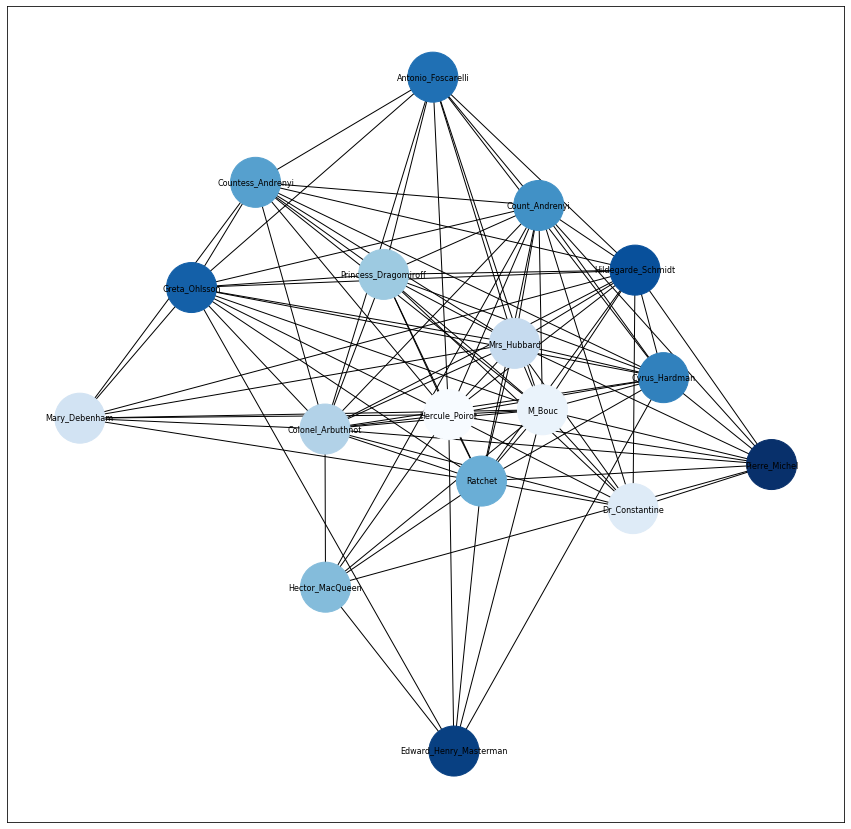

In [59]:
#Clique Percolation Method (K-Clique)

plt.figure(3, figsize=(15,15))
nx.draw_networkx(G,with_labels=True, node_size=2500, font_size = 8, node_color=range(17), cmap=plt.cm.Blues)

In [60]:
# To search for all maximal cliques in a graph.
list(nx.find_cliques(G))  

[['Hercule_Poirot',
  'M_Bouc',
  'Edward_Henry_Masterman',
  'Ratchet',
  'Cyrus_Hardman',
  'Greta_Ohlsson'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Edward_Henry_Masterman',
  'Ratchet',
  'Hector_MacQueen'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Colonel_Arbuthnot',
  'Mary_Debenham',
  'Mrs_Hubbard',
  'Hildegarde_Schmidt',
  'Greta_Ohlsson',
  'Countess_Andrenyi'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Colonel_Arbuthnot',
  'Mary_Debenham',
  'Mrs_Hubbard',
  'Hildegarde_Schmidt',
  'Greta_Ohlsson',
  'Ratchet'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Colonel_Arbuthnot',
  'Count_Andrenyi',
  'Mrs_Hubbard',
  'Hildegarde_Schmidt',
  'Dr_Constantine',
  'Ratchet',
  'Princess_Dragomiroff'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Colonel_Arbuthnot',
  'Count_Andrenyi',
  'Mrs_Hubbard',
  'Hildegarde_Schmidt',
  'Dr_Constantine',
  'Ratchet',
  'Pierre_Michel'],
 ['Hercule_Poirot',
  'M_Bouc',
  'Colonel_Arbuthnot',
  'Count_Andrenyi',
  'Mrs_Hubbard',
  'Hildegarde_Schmidt',
  'Cyrus_Hardman',
  'Prin

In [61]:
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph.
synthetic = nx.make_max_clique_graph(G)  
print(synthetic.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


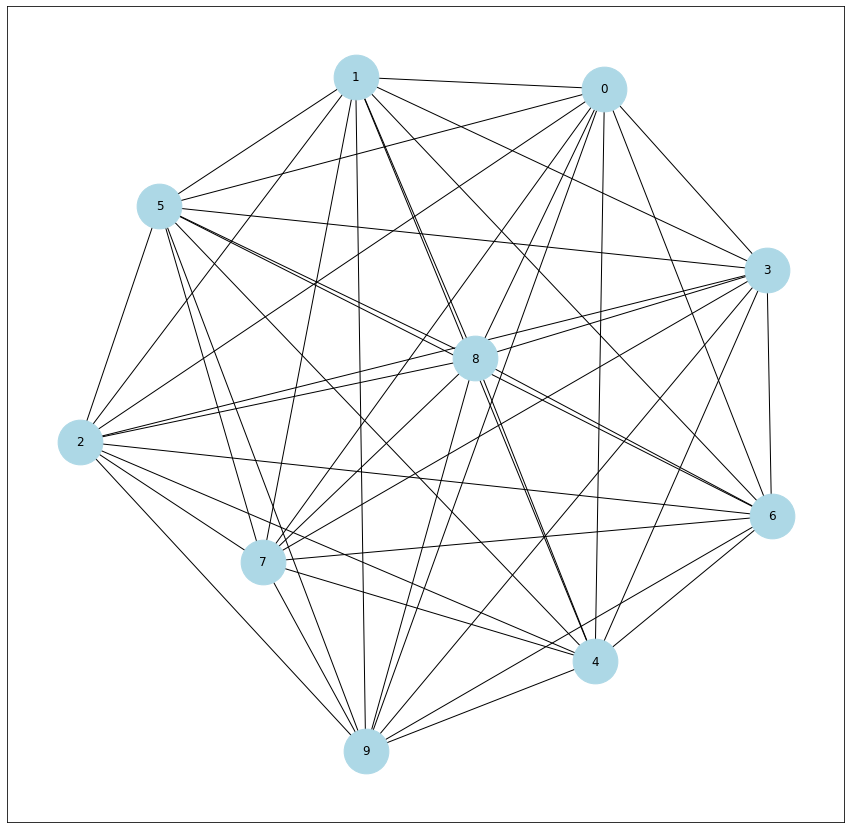

In [76]:
plt.figure(4, figsize=(15,15))
nx.draw_networkx(synthetic, node_size = 2000, node_color = "lightblue")


K-Clique community

In [63]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[frozenset({'Hercule_Poirot', 'Mrs_Hubbard', 'Princess_Dragomiroff', 'Dr_Constantine', 'Hildegarde_Schmidt', 'Pierre_Michel', 'Count_Andrenyi', 'Countess_Andrenyi', 'Cyrus_Hardman', 'Ratchet', 'M_Bouc', 'Greta_Ohlsson', 'Colonel_Arbuthnot', 'Antonio_Foscarelli'})]


In [64]:
print(len(list(c)))

1


In [ ]:
print(list(c[0]))


['Colonel_Arbuthnot', 'Greta_Ohlsson', 'Cyrus_Hardman', 'Princess_Dragomiroff', 'Mrs_Hubbard', 'Pierre_Michel', 'Ratchet', 'Countess_Andrenyi', 'Antonio_Foscarelli', 'M_Bouc', 'Count_Andrenyi', 'Dr_Constantine', 'Hildegarde_Schmidt', 'Hercule_Poirot']



Girvann Newman community detection

[['Count_Andrenyi', 'Countess_Andrenyi', 'Cyrus_Hardman', 'Hector_MacQueen', 'Mary_Debenham', 'Ratchet', 'M_Bouc', 'Hercule_Poirot', 'Mrs_Hubbard', 'Princess_Dragomiroff', 'Dr_Constantine', 'Greta_Ohlsson', 'Colonel_Arbuthnot', 'Hildegarde_Schmidt', 'Antonio_Foscarelli', 'Pierre_Michel'], ['Edward_Henry_Masterman']]


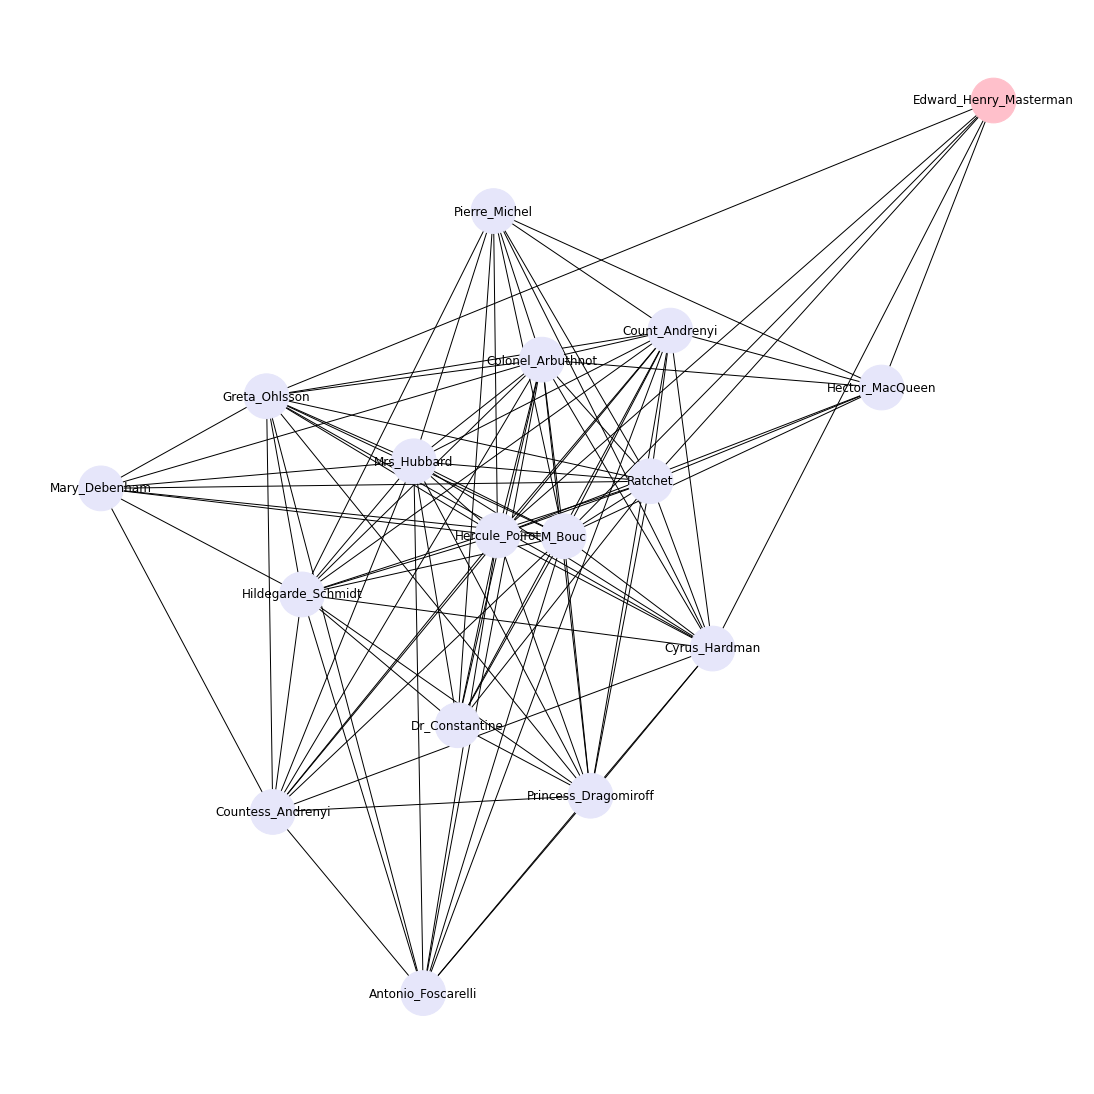

In [65]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("lavender")
    else:
        color_map.append("pink")

plt.figure(5, figsize=(15,15))
nx.draw(G, node_color=color_map, with_labels=True, node_size = 2000)


Louvain community detection

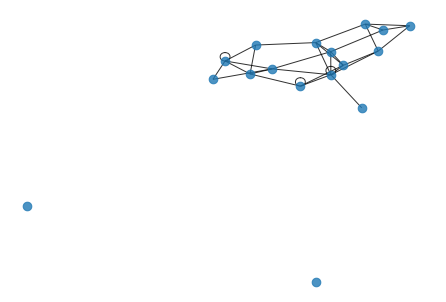

In [ ]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt


def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = len(G)
G_ = generate_network(n)
# nx.info(G_)

# visualize graph
pos = nx.spring_layout(G_)
nx.draw(G_, pos, node_size = 75, alpha = 0.8)
plt.show()

<h3> Degree distribution and generative models </h3>

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  17
Edges:  101
Average degree:  5.9411764705882355


<h3> Degree distribution </h3>

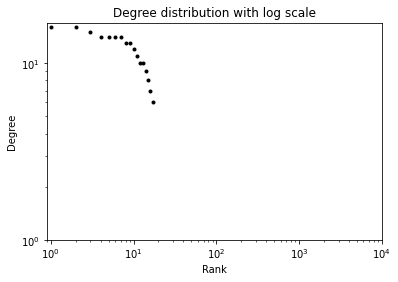

In [ ]:
#degree distribution
# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.show()

Size of largest component

In [ ]:
#Size of largest component 

a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: True

 no of connected components: 1

 Connected component length:17

 Connected component :
{'Colonel_Arbuthnot', 'Cyrus_Hardman', 'M_Bouc', 'Princess_Dragomiroff', 'Antonio_Foscarelli', 'Greta_Ohlsson', 'Count_Andrenyi', 'Mrs_Hubbard', 'Edward_Henry_Masterman', 'Hector_MacQueen', 'Mary_Debenham', 'Dr_Constantine', 'Ratchet', 'Pierre_Michel', 'Hildegarde_Schmidt', 'Countess_Andrenyi', 'Hercule_Poirot'}


In [ ]:
#Average shortest path

sum = 0
for i in range(len(characters)):
  for j in range(i, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  1.542857142857143


<h3> Creating equivalent generative models for comparison </h3>

In [ ]:
nodes=G.number_of_nodes()
nodes

17

In [69]:
#Calculating average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Hercule_Poirot  : Degree is  16
Node  M_Bouc  : Degree is  16
Node  Dr_Constantine  : Degree is  9
Node  Mary_Debenham  : Degree is  8
Node  Mrs_Hubbard  : Degree is  14


3.7058823529411766

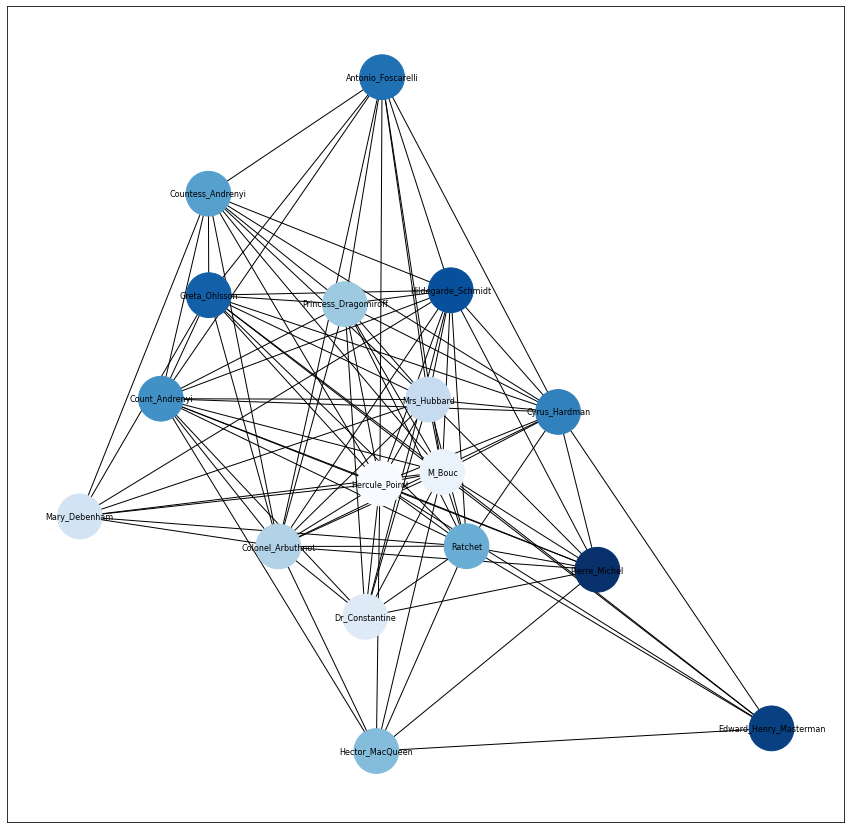

In [66]:
#Original graph
plt.figure(3, figsize=(15,15))
nx.draw_networkx(G,with_labels=True, node_size=2000, font_size = 8, node_color=range(17), cmap=plt.cm.Blues)

G(n,p)

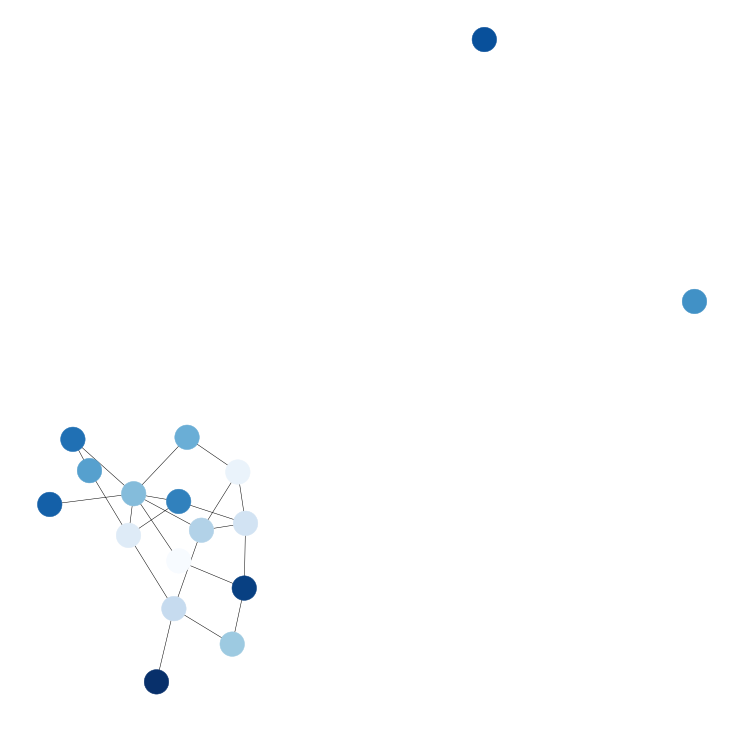

In [70]:
#G(n,p)
p = avg_degree/(no_nodes-1) 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 600, node_color=range(17), cmap=plt.cm.Blues, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

Preferential attachment - Barabasi Model

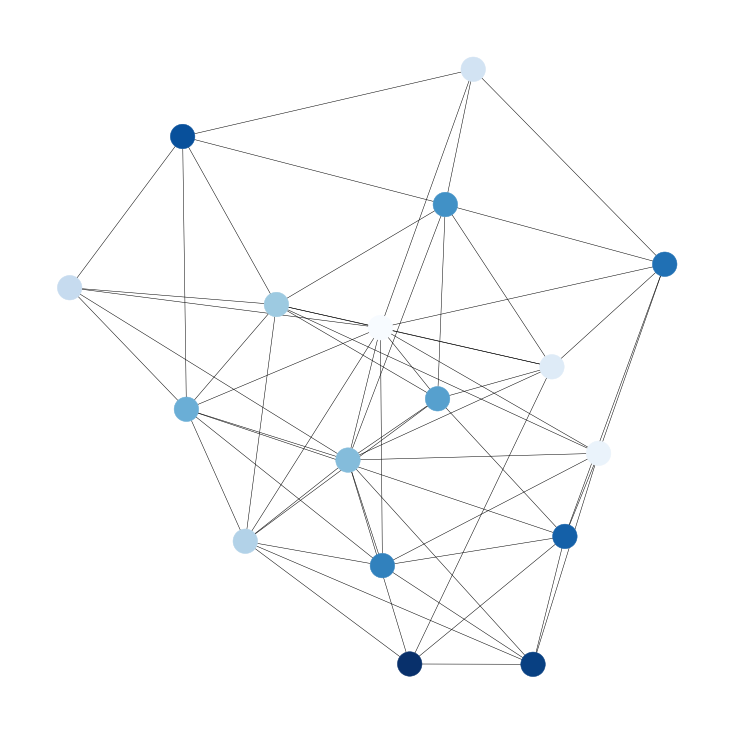

In [72]:
#Preferential attachment

neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 600, node_color=range(17), cmap=plt.cm.Blues, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

Small world model - Newman Watts Strogatz

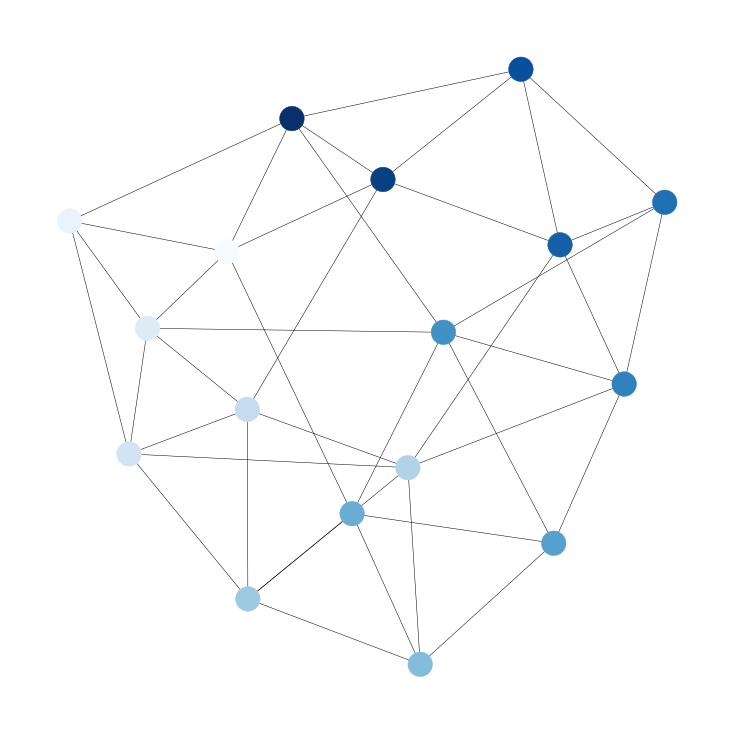

In [73]:
#small world model

H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 600, node_color=range(17), cmap=plt.cm.Blues, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

<h2> <b> Part - 2: Analysis </b></h2>

In [ ]:
#CHARACTER STUDY
#Comparing centrality values to determine the protagnoist

from operator import itemgetter
degc = nx.degree_centrality(G)
#list scores
deg_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(deg_list[i])

('Hercule_Poirot', 1.0)
('M_Bouc', 1.0)
('Colonel_Arbuthnot', 0.9375)
('Mrs_Hubbard', 0.875)
('Ratchet', 0.875)


In [ ]:
betc = nx.betweenness_centrality(G)
bet_list = sorted(betc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(bet_list[i])

('Hercule_Poirot', 0.05068452380952381)
('M_Bouc', 0.05068452380952381)
('Ratchet', 0.03463955026455026)
('Colonel_Arbuthnot', 0.03221230158730159)
('Count_Andrenyi', 0.023035714285714284)


In [ ]:
closc = nx.closeness_centrality(G)
clo_list = sorted(closc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(clo_list[i])

('Hercule_Poirot', 1.0)
('M_Bouc', 1.0)
('Colonel_Arbuthnot', 0.9411764705882353)
('Mrs_Hubbard', 0.8888888888888888)
('Ratchet', 0.8888888888888888)


In [ ]:
pgr=nx.pagerank(G)
pag_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(pag_list[i])

('Hercule_Poirot', 0.23375077026751984)
('M_Bouc', 0.15066072742111397)
('Ratchet', 0.11322956024642339)
('Mrs_Hubbard', 0.07086247844351741)
('Colonel_Arbuthnot', 0.05015754097098369)


The four centrality measures here all coincide and hence we can conclude that the protagonist of the story is Hercule Poirot.

In [ ]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)
     

In [ ]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [ ]:
from scipy.stats import pearsonr

C:\Users\kulka\AppData\Local\Temp\ipykernel_20596\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coefficient degree and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coefficient degree and closeness: " + repr(r2)
print (s)

r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coefficient betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coefficient betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coefficient degree and betweenness: (0.8490764679838901, 1.625987262182816e-05)

 Pearson Correlation Coefficient degree and closeness: (0.9908070993755558, 1.9002484739329546e-14)

 Pearson Correlation Coefficient betweennness and closeness: (0.9039065420690672, 6.49411681249058e-07)

 Pearson Correlation Coefficient betweennness and eigenvector : (0.7618071988148526, 0.00037973263347952744)


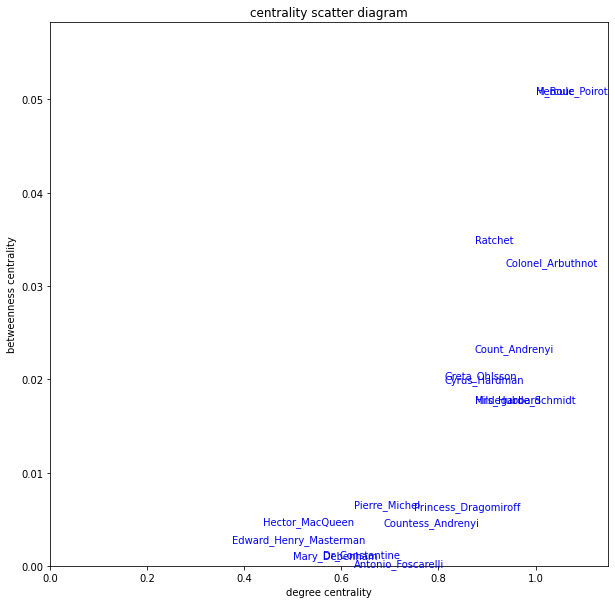

In [ ]:
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)


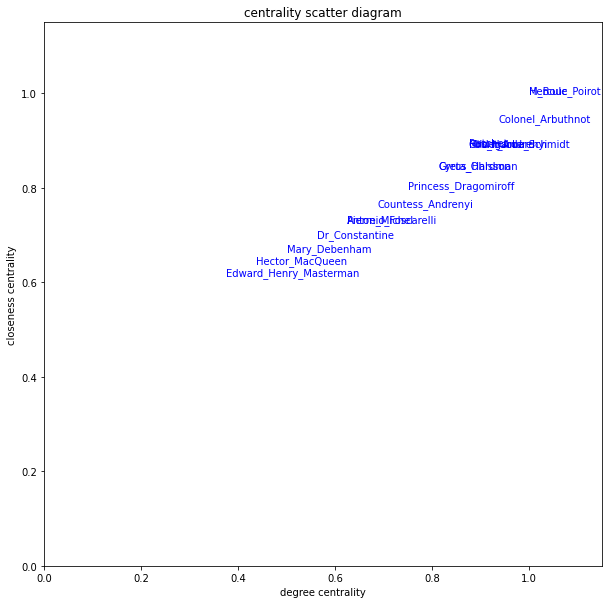

In [ ]:
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)


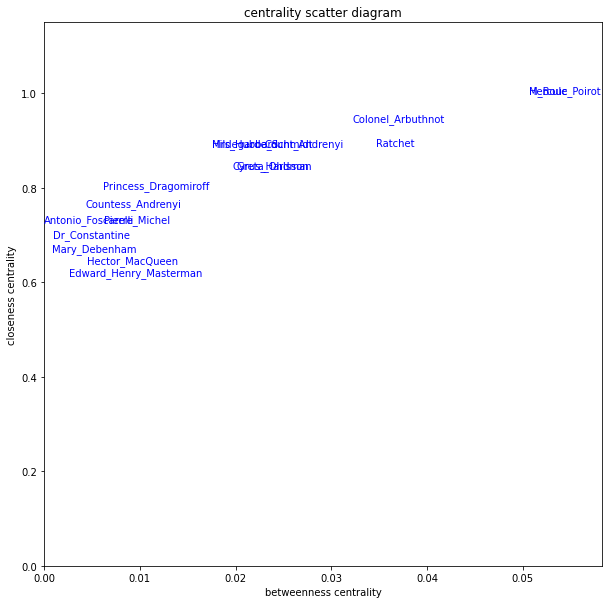

In [ ]:
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)


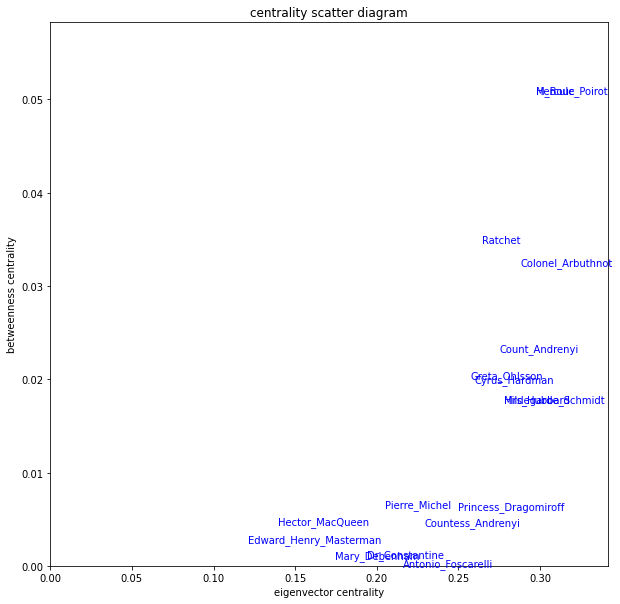

In [ ]:
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

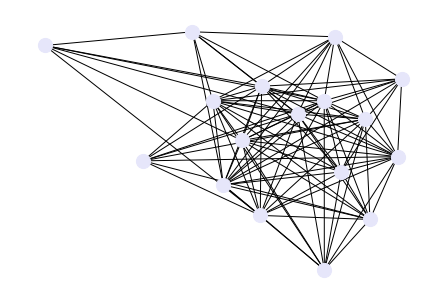

In [ ]:
#EGO NETWORK

s='Hercule_Poirot'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color=range(17), cmap=plt.cm.Blues,node_size=200,with_labels=False)
plt.show()
nx.write_gml(hub_ego,"egonw_paul.gml")

In [ ]:
#AVERAGE SHORTEST PATH
sum = 0
for i in range(len(characters)):
  for j in range(i+1, len(characters)):
    sum = sum + len(nx.shortest_path(G, characters[i], characters[j]))
avg_shortest_path = sum/(21*10) #21C2
print('Average shortest path of graph is: ', avg_shortest_path)

Average shortest path of graph is:  1.4619047619047618


This is a small average geodesic; the model can be a generative model

In [ ]:
#Clustering Coefficient
#Local clustering coeff for characters
nx.clustering(G)

{'Hercule_Poirot': 0.7083333333333334,
 'M_Bouc': 0.7083333333333334,
 'Dr_Constantine': 0.9722222222222222,
 'Mary_Debenham': 0.9642857142857143,
 'Mrs_Hubbard': 0.8241758241758241,
 'Colonel_Arbuthnot': 0.7619047619047619,
 'Princess_Dragomiroff': 0.9090909090909091,
 'Hector_MacQueen': 0.8571428571428571,
 'Ratchet': 0.7362637362637363,
 'Countess_Andrenyi': 0.9272727272727272,
 'Count_Andrenyi': 0.8021978021978022,
 'Cyrus_Hardman': 0.8205128205128205,
 'Antonio_Foscarelli': 1.0,
 'Greta_Ohlsson': 0.8205128205128205,
 'Hildegarde_Schmidt': 0.8241758241758241,
 'Edward_Henry_Masterman': 0.8666666666666667,
 'Pierre_Michel': 0.8888888888888888}

The clustering coefficient is related to transitivity in that it can be used as a measure of transitivity. Specifically, the global clustering coefficient of a network is equal to the fraction of closed triads in the network, and the average clustering coefficient of a node is related to the local transitivity of the node's neighborhood. Therefore, a high clustering coefficient of a node indicates that its neighbors are highly interconnected, which suggests a high probability of transitivity in the network.

In [ ]:
#COMMUNITIES
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[frozenset({'Colonel_Arbuthnot', 'Greta_Ohlsson', 'Cyrus_Hardman', 'Princess_Dragomiroff', 'Mrs_Hubbard', 'Pierre_Michel', 'Ratchet', 'Countess_Andrenyi', 'Antonio_Foscarelli', 'M_Bouc', 'Count_Andrenyi', 'Dr_Constantine', 'Hildegarde_Schmidt', 'Hercule_Poirot'})]


In [ ]:
print(len(list(c)))

1


In [ ]:

print(list(c[0]))


['Colonel_Arbuthnot', 'Greta_Ohlsson', 'Cyrus_Hardman', 'Princess_Dragomiroff', 'Mrs_Hubbard', 'Pierre_Michel', 'Ratchet', 'Countess_Andrenyi', 'Antonio_Foscarelli', 'M_Bouc', 'Count_Andrenyi', 'Dr_Constantine', 'Hildegarde_Schmidt', 'Hercule_Poirot']


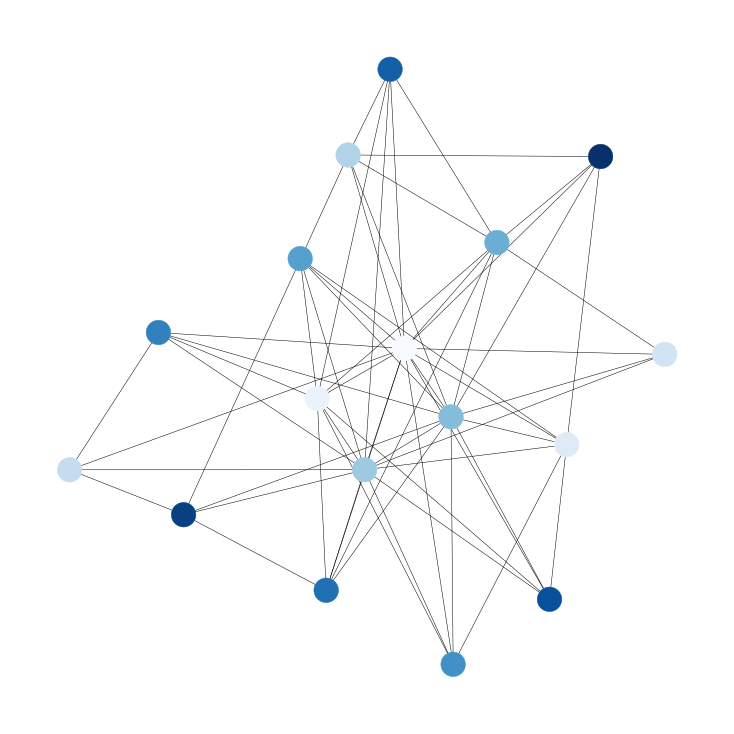

In [74]:
#Generative model
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 600,node_color=range(17), cmap=plt.cm.Blues, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In this analysis, we have examined how our graph compares with the Preferential Attachment model which is characterized by nodes being connected to other nodes that have a high degree, similar to how social networks function in real life. This model exhibits a power law distribution and a low average shortest path length, however, it does not have a high clustering coefficient. In contrast, our graph has a low average shortest path length and a high clustering coefficient, but it does not follow a power law distribution. Nonetheless, our graph is partially consistent with the Preferential Attachment model since the characters in our story tend to be connected to the main protagonists who play a central role.